# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data analysis

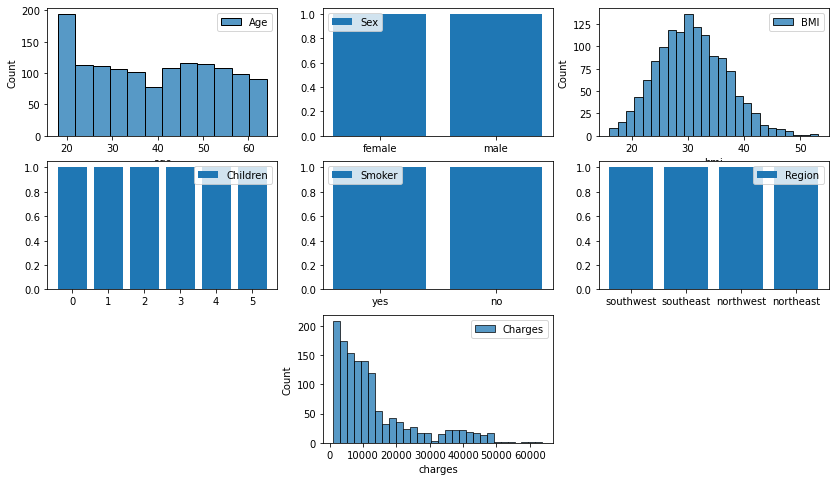

In [6]:
plt.figure(figsize=(14,8))
plt.subplot(3,3,1)
sns.histplot(df['age'],label='Age')
plt.legend()

plt.subplot(3,3,2)
plt.bar(df['sex'],1,label='Sex')
plt.legend()

plt.subplot(3,3,3)
sns.histplot(df['bmi'],label='BMI')
plt.legend()

plt.subplot(3,3,4)
plt.bar(df['children'],1,label='Children')
plt.legend()

plt.subplot(3,3,5)
plt.bar(df['smoker'],1,label='Smoker')
plt.legend()

plt.subplot(3,3,6)
plt.bar(df['region'],1,label='Region')
plt.legend()

plt.subplot(3,3,8)
sns.histplot(df['charges'],label='Charges')
plt.legend()


plt.show()

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

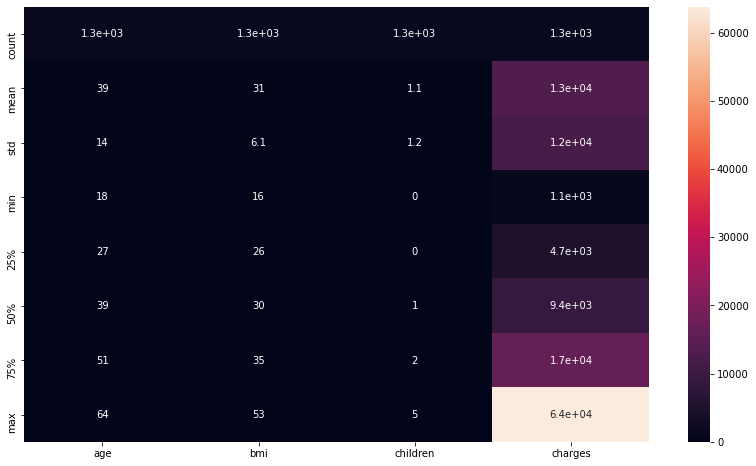

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),annot=True,data=df)

<AxesSubplot:>

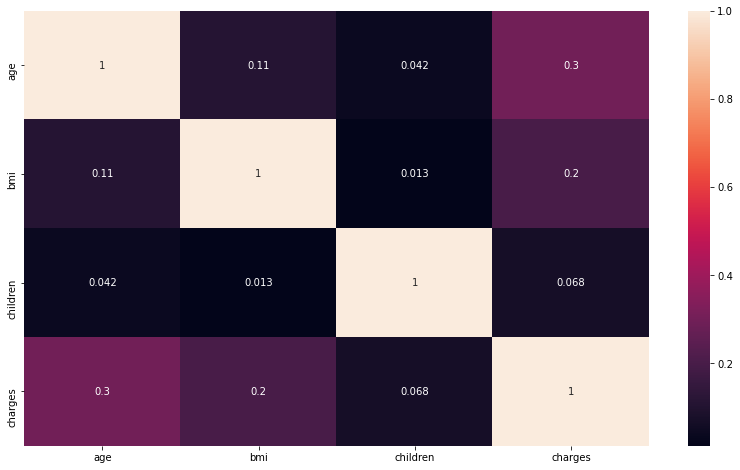

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1dc5e960040>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1dc5e952a00>,
 'cmins': <matplotlib.collections.LineCollection at 0x1dc5e971a00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1dc5e971fd0>}

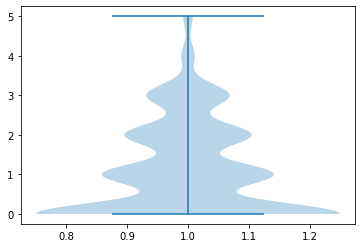

In [10]:
plt.violinplot(df['children'])

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

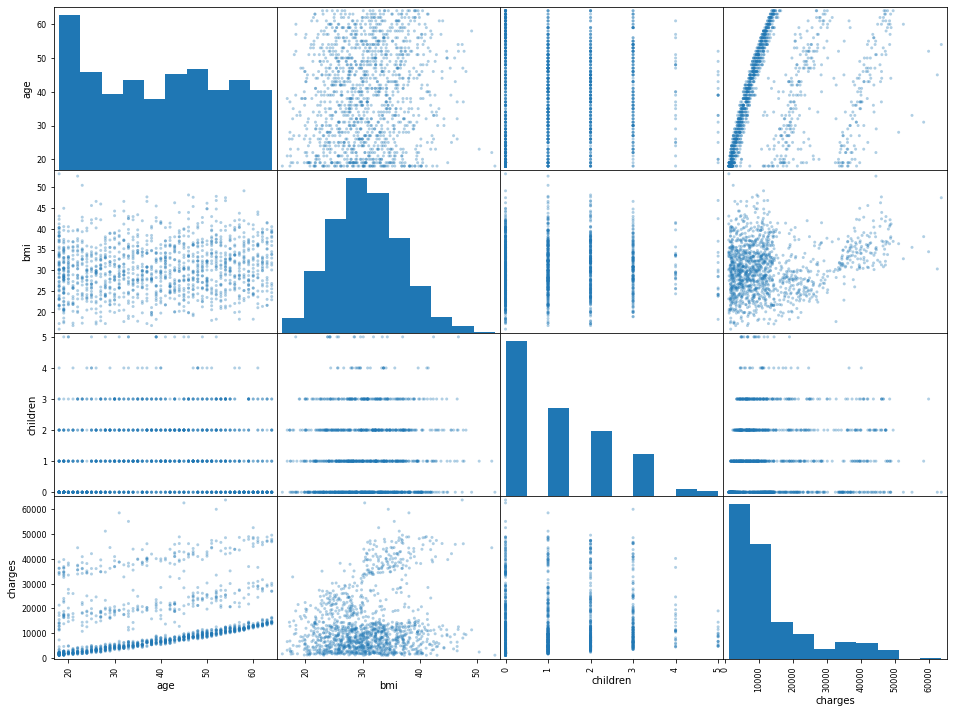

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(16,12),alpha=.35)

# Encoding

In [12]:
cols = ['sex','smoker','region']
for col in cols:
    one = pd.get_dummies(df[col])
    df = pd.concat([df, one], axis=1).drop(col, axis=1)

In [13]:
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Split data into train and test

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
x=df.drop(['charges'],axis=1)
x.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [16]:
y=df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

# Linear Regressoin with multiple variable

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [21]:
m = reg.coef_
m

array([   243.81714377,    373.09404929,    601.96698105,     54.06313936,
          -54.06313936, -11679.72412986,  11679.72412986,    259.7149821 ,
          524.60118402,   -312.6038088 ,   -471.71235732])

In [22]:
c = reg.intercept_
c 

-1549.6045963057677

In [23]:
ypred_reg=reg.predict(xtest)
ypred_reg

array([ 9660.24471309, 26116.2657322 ,  1982.46205108, 30019.78009416,
       38732.08559305,  9489.35029709, 28376.46927727,  6868.50646716,
        6039.36149725, 13120.63091099,   810.77385654, 27777.54946813,
       16843.09407486,  8991.7025373 , 10090.73486691,  9496.68551558,
        8671.85324538, 31749.49757316,  9485.74952041,  6346.08788723,
       12424.3326192 , 11969.28179805,  6905.76326946,  1003.25332475,
       31123.81391829, 16500.85950599,  8357.02756402, 10382.82092512,
        9327.31834541,  4378.92997509, 11268.4512793 , 15995.26103626,
       15607.48817822,  9611.99056549, 11282.21964338, 14825.07035767,
       33755.95336156,  7922.33833162, 15368.92684288, -1433.01448615,
       13157.54385089,  3359.36436209,  4905.50332316, 15683.72567952,
        2529.29122103,  6365.77463021,  7988.71694577,  8139.87224728,
       10865.80833079,  3060.15496811, 14658.712042  ,  2515.2569468 ,
        3990.81890194,  6774.1406417 , 15222.84756808,  7002.04343537,
      

# KNN Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knn = KNeighborsRegressor(n_neighbors=50)

In [26]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=50)

In [27]:
ypred_knn=knn.predict(xtest)
ypred_knn

array([14505.6223166,  8193.8059136,  7816.6791468, 13397.5262936,
       19475.311834 , 14693.4602532,  7587.7567326, 14099.9984114,
        9187.0710428, 15589.3426544,  7488.561502 , 10901.5517346,
       19915.9478066, 15749.0250422, 16057.4856586, 13923.823429 ,
       15021.6355106, 17369.559541 , 12533.582216 , 12512.6732536,
       15665.197069 , 13605.3990424, 10615.74722  ,  6215.907709 ,
       14696.8067996, 19684.4496044, 10338.2582404, 12904.103223 ,
       10668.5267988, 10528.8458976, 14868.3723236, 20620.5520198,
       21507.2536504,  9671.3772474, 14395.7074574, 17118.0877636,
       14372.7763106,  8426.8443906, 19769.804923 ,  6850.939803 ,
       17296.3112296,  8341.4546938,  8607.277071 , 18294.5749956,
        6909.092115 , 12477.2062346,  9777.5708814, 10770.622533 ,
       14112.9410908,  7204.551278 , 20290.1394142,  7029.2192316,
        8689.6838174, 12824.4520078, 19378.598303 ,  7830.2217434,
       14466.03617  , 16688.2007472,  9443.3222412,  8223.0050

# Model evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
from sklearn.metrics import r2_score
print("Linear regression Accuracy:",r2_score(ytest, ypred_reg))
print("KNN regression Accuracy:",r2_score(ytest, ypred_knn))

Linear regression Accuracy: 0.7707418983629328
KNN regression Accuracy: 0.14731354364041926


# Improving KNN score

In [30]:
training_accuraacy=[]
testing_accuracy=[]

neighbors=range(1,700)

for number_of_neighbors in neighbors:
    KNN=KNeighborsRegressor(n_neighbors=number_of_neighbors)
    KNN.fit(xtrain,ytrain)
    training_accuraacy.append(KNN.score(xtrain,ytrain))
    testing_accuracy.append(KNN.score(xtest,ytest))

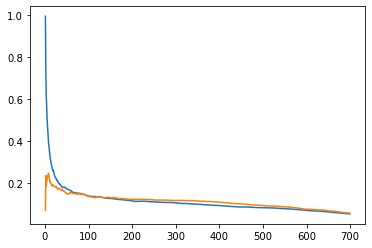

In [31]:
plt.plot(neighbors,training_accuraacy,label='Trining accuracy')
plt.plot(neighbors,testing_accuracy,label='Trining accuracy')

In [32]:
training_accuraacy=[]
testing_accuracy=[]

neighbors=range(1,10)

for number_of_neighbors in neighbors:
    KNN=KNeighborsRegressor(n_neighbors=number_of_neighbors)
    KNN.fit(xtrain,ytrain)
    training_accuraacy.append(KNN.score(xtrain,ytrain))
    testing_accuracy.append(KNN.score(xtest,ytest))

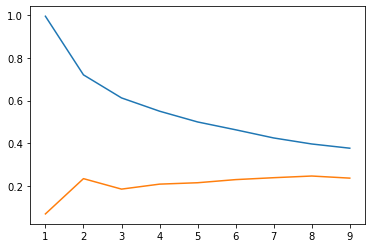

In [33]:
plt.plot(neighbors,training_accuraacy,label='Trining accuracy')
plt.plot(neighbors,testing_accuracy,label='Trining accuracy')

In [34]:
Knn = KNeighborsRegressor(n_neighbors=5)

In [35]:
Knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [36]:
ypred_Knn=Knn.predict(xtest)
ypred_Knn

array([23498.698236, 14106.17644 ,  2982.7869  ,  9296.18467 ,
       24035.6064  ,  7578.156924,  7214.08255 , 12005.08238 ,
       12987.973738, 18287.1018  ,  5260.95473 , 11955.69368 ,
       31347.53496 ,  8605.39414 , 13878.67121 , 14899.37809 ,
       12326.50813 , 16284.816748,  6767.36951 , 23620.28174 ,
       14975.86371 , 12514.63105 ,  9968.37845 ,  5456.62037 ,
       40586.944968, 10162.11479 ,  9981.37446 , 14224.8303  ,
        5029.92079 ,  3112.90661 , 16036.650274, 28142.05128 ,
       24327.409972,  8807.867616, 13521.385684, 12069.94517 ,
       26317.66415 ,  6619.88651 , 23654.184856,  5814.320288,
        6230.62679 ,  2139.05277 ,  5340.72562 , 22284.56412 ,
        4724.31381 ,  2097.83655 ,  6669.92369 ,  4910.05492 ,
       18384.93841 ,  7391.29428 , 13804.03573 ,  5916.04476 ,
       11101.143424, 10716.66413 , 15500.136208,  5310.45532 ,
       10827.06025 , 12571.982442,  3976.36227 ,  7013.668728,
       12936.485378, 17544.078188, 10336.36393 , 10197.

# KNN accuracy after updating neighbors value

In [37]:
print("KNN regression Accuracy:",r2_score(ytest, ypred_Knn))

KNN regression Accuracy: 0.21453295500578362


# Compare Between Model

In [38]:
acu_vis={
    'algorithm':['Linear Regression','KNN Regression'],
    'accuracy':[0.7176387732640239,0.29666516243229235]
}

In [39]:
accuracy_df=pd.DataFrame(acu_vis)
accuracy_df

,algorithm,accuracy
0,Linear Regression,0.717639
1,KNN Regression,0.296665


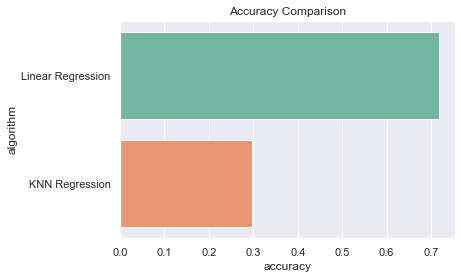

In [40]:
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="algorithm",x='accuracy',data=accuracy_df,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

# Comparison after Updating value of neighbors

In [41]:
acu_vis2={
    'algorithm':['Linear Regression','KNN Regression'],
    'accuracy':[0.7176387732640239,0.2101754787935507]
}

In [42]:
accuracy_df2=pd.DataFrame(acu_vis)
accuracy_df2

,algorithm,accuracy
0,Linear Regression,0.717639
1,KNN Regression,0.296665


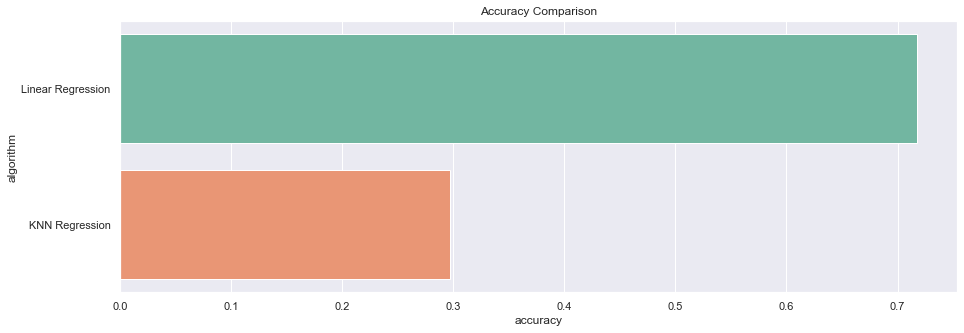

In [43]:
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="algorithm",x='accuracy',data=accuracy_df2,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})